<a href="https://colab.research.google.com/github/yeonnex/Colab/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_numpy_softmax_crossentropy_%EC%B2%A0%ED%8C%90%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

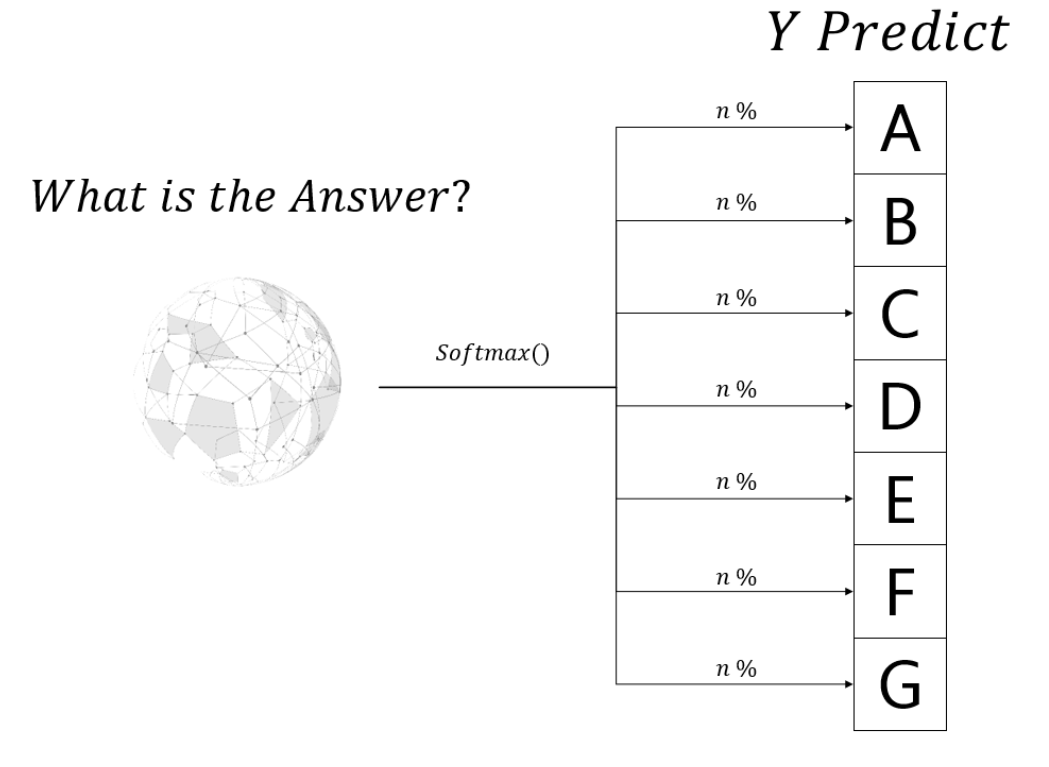

### 지금부터 신경망 만들 것!

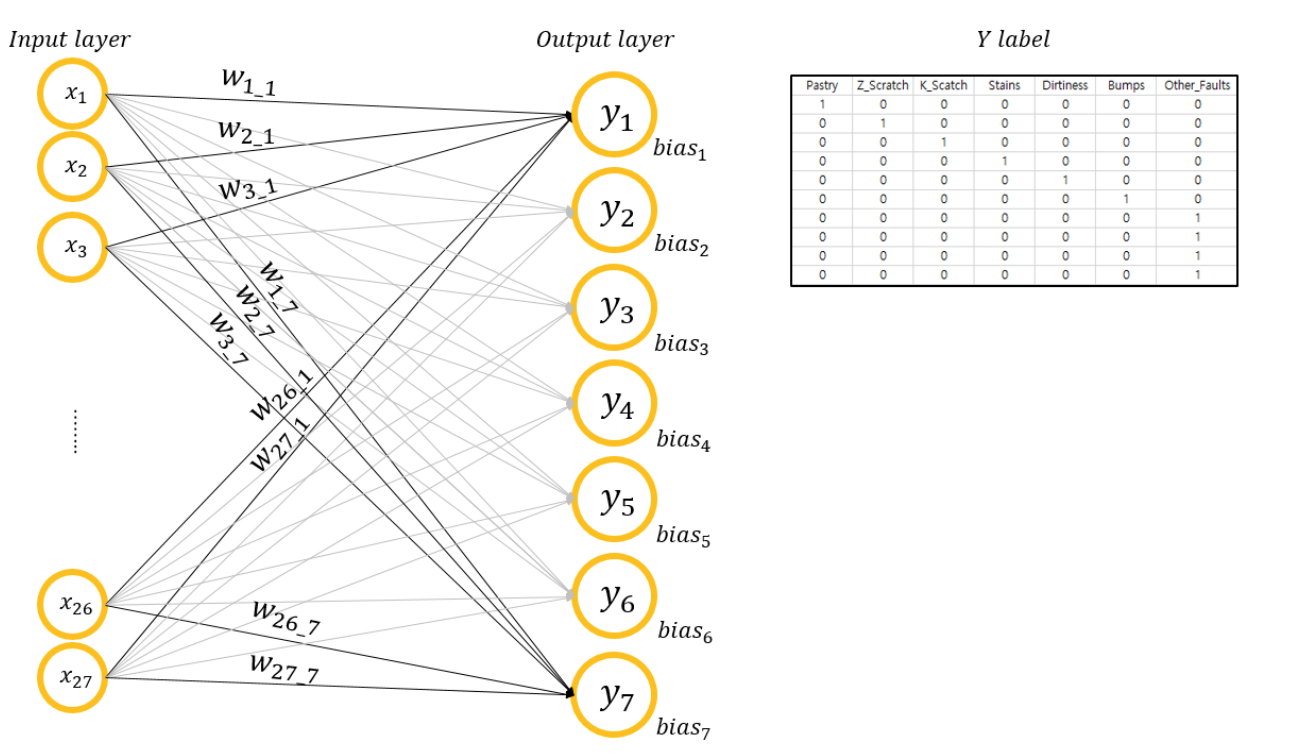

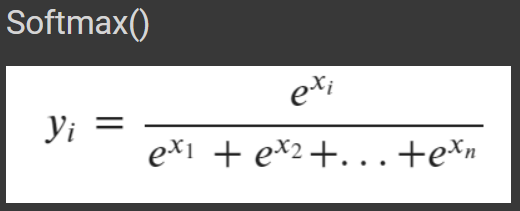

소프트맥스 함수는 위처럼 생김. 자연상수 e에 올라가 있는 x 들은 input x값들이 아니라, **신경망이 출력한 y 값**이다.

왜 굳이 굳이 e에 올려서 쓰는가?
바로, 값에 대한 변화에 좀 더 민감하게 대응할 수 있기 떄문이다.

근데 이렇게 e를 활용하면, 두가지 문제가 생기게 된다.

In [ ]:
import numpy as np
def func_exp(x):
    return np.round(np.exp(x), 3)

In [ ]:
# 문제 1 - 신경망이 출력한 값이 큰 양수라면, 오버플로우 문제!
Country = {
    'KOR' : 2000.0,
    'CHN' : 1000.0,
    'JPN' : -1200,
    'USA' : -700
}

In [ ]:
a_row = []
for i in Country.values():
  a_row.append(func_exp(i))
print(a_row)

[inf, inf, 0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


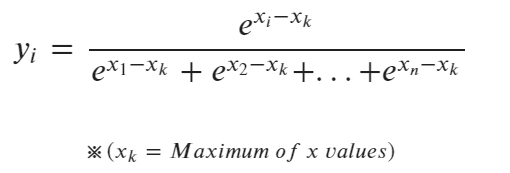

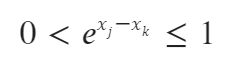

## 간단히 해결!

활성화함수인 교차엔트로피도 그냥은 못씀. 신경망의 출력값에 아주 작은 엡실론값을 더해주어야 쓸 수 있음

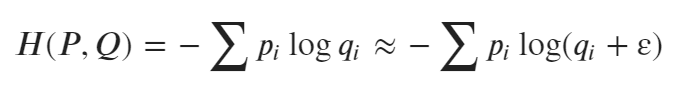

In [ ]:
q_1 = 0.800
q_2 = 0.2
q_3 = 0.00

print(np.log(q_1))
print(np.log(q_2))
print(np.log(q_3))

-0.2231435513142097
-1.6094379124341003
-inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [ ]:
epsilon = 1.0e-10
print(np.log(q_1+epsilon))
print(np.log(q_2+epsilon))
print(np.log(q_3+epsilon))

# 엡실론 값을 더해주어도, 값에 별로 차이가 없어보임!!!
# 값의 차이가 너무나 미미하게 나기때문에 괜춘! 엡실론 값을 더해주어도 괜찮음!
# 딥러닝은 실용학문이기때문!

-0.2231435511892097
-1.6094379119341002
-23.025850929940457


In [ ]:
Real_Prob = np.array([0.526, 0.295, 0.179])
AIRIM_Q   = np.array([0.800, 0.2, 0.000]) 

In [ ]:
class Entropy():
    def __init__(self, Prob, Q):
        self.Prob = Prob 
        self.Q    = Q

In [ ]:
epsilon = 1.0e-10

In [ ]:
def out_entropy(self, H_Q = True):
    global cross_entropy, info_entropy
    amount_of_info_row = []

    if H_Q == True:
        for i in range(len(self.Q)):
            amount_of_info = - self.Prob[i] * (np.log(self.Q[i] + epsilon))
            amount_of_info_row.append(amount_of_info)
    
        cross_entropy = np.sum(amount_of_info_row)
        print("--- Cross Entropy ---")

        return np.round(cross_entropy,3)


    else :
        for p in self.Prob:
            amount_of_info = -p * np.log(p)
            amount_of_info_row.append(amount_of_info)
        
        info_entropy = np.sum(amount_of_info_row)
        print("--- Infomation Entropy ---")
    
        return np.round(info_entropy,3)

Entropy.entropy_epsilon = out_entropy

In [ ]:
class_entropy = Entropy(Real_Prob, AIRIM_Q)

In [ ]:
cross_entropy = class_entropy.entropy_epsilon(H_Q=True)
print("cross_entropy : ", cross_entropy)

--- Cross Entropy ---
cross_entropy :  4.714


## 설계도를 보자!

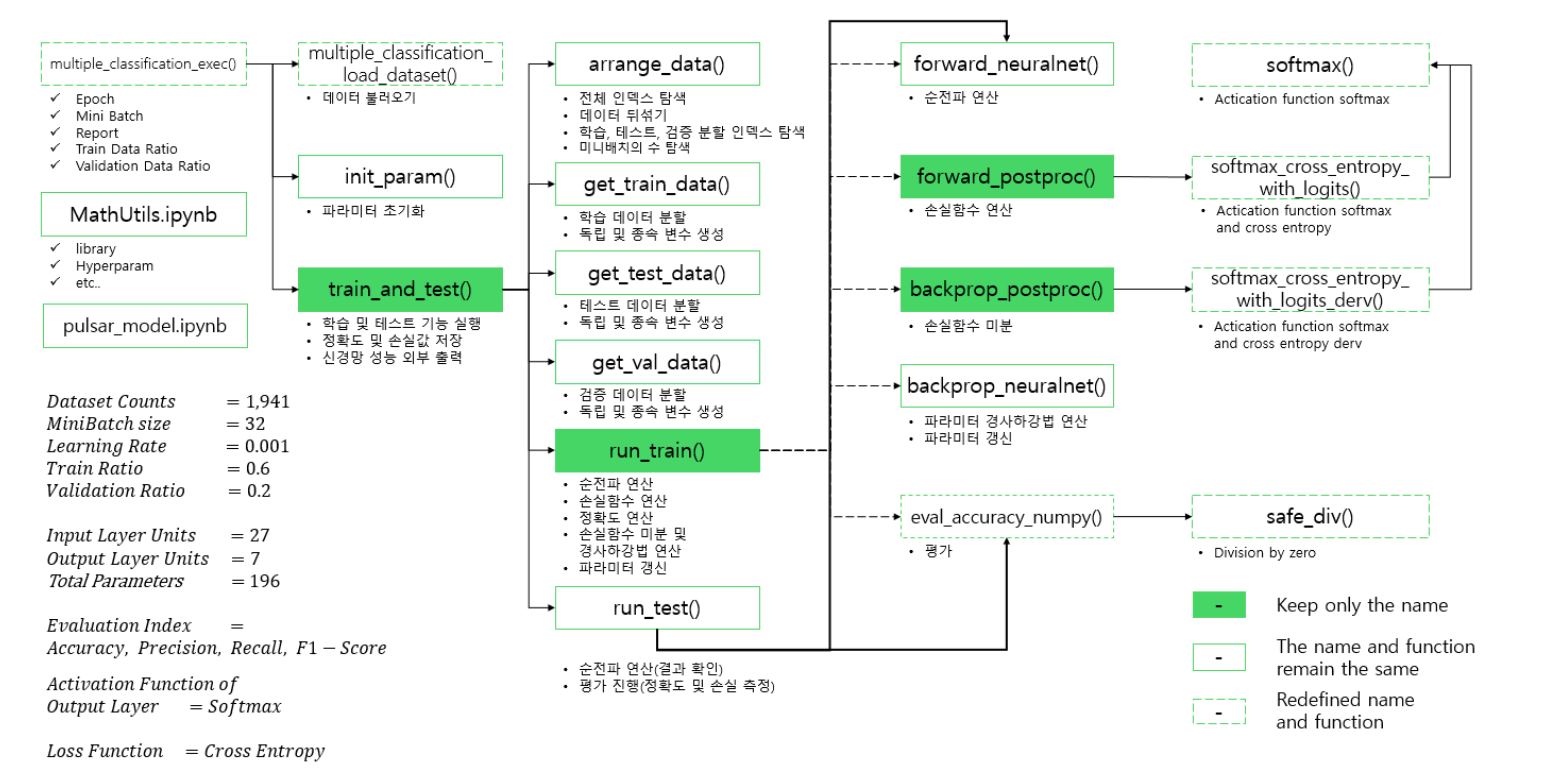

- multiple_classification_exec() 
이 함수는 버튼 역할을 하는 메인 함수다. 버튼 띡!
- multiple_classification_load_dateset()
데이터를 불러오는 함수

...
- eval_accuracy_numpy()
이 평가 함수, 저번 pulsar 데이터 할때 만들었었음. 평가할 때, 단순히 accuracy만 주지 않고 recall값, f1 score, accuracy 로 평가할 수 있게 함. 이걸 Numpy 버전과 사이킷런버전을 만들었었음!

사이킷런 버전을 쓰지 않는 이유는, 일단 느림. 그리고, 0으로 나눴을 때 발생하는 에러코드가 같이 출력되기 때문에 쓰기 애매했음. 그래서 직접 넘파이로 만든걸로 쓰기로 함!

- safe_div()가 0으로 나눴을 때 발생하는 문제점을 극복하기 위한 함수!

- softmax() 는 두가지 문제를 극복했던, 방금 위에서 한 함수

- softmax_cross_entropy_with_logits()
손실함수를 구해주는 함수. 이것도 방금 위에서 엡실론값 더해주어 문제 해결한 함수임.

- softmax_cross_entropy_with_logits_derv()
도함수. 편미분 (아직 구현하지 않음)

많은 함수들을 직접 만들어놓았기 때문에, 필요한거 그냥 다시 가져다가 쓰면 됨!

## 필요한 파일 & 데이터
- MathUtils.ipynb (학습률, 표준편차 등의 값)
- pulsar_model.ipynb (이진분류때 만들었던 함수들)
- faults.csv
- faults_mini.csv

위 네가지 파일들을 불러와주자!

mini 데이터는 행이 10개밖에 없는 아주 작은 데이터이다. 이를 쓰는 이유는, 구축할 때 그 값의 변화가 어떻게 변하는지 간단하게 눈으로 보기 위해서임

구축할때는 작은데이터로 먼저 만들고, 구축을 완료하고 난 다음에 전체 데이터로 학습을 하면서 파라미터를 조정, 하이퍼파라미터 조정 등의 작업을 하면 됨!

전체 데이터가 1941개, 배치사이즈나 러닝레이트는 뭐.. 바꿔줄수도 있고!

Input Layer Units : 독립변수의 개수임. 이 데이터의 경우 독립변수의 개수가 27개이다.
Output Later Units : 종속 변수의 개수임. 7개

마지막계층은 Softmax이고, 손실함수는 Cross Entropy를 사용할 것임

### 은닉계층은 없음.


In [ ]:
%run /content/MathUtils.ipynb

In [ ]:
%run /content/pulsar_model.ipynb

In [ ]:
df = pd.read_csv('/content/faults.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

마지막의 7개가 독립변수임. 독립변수인지 어떻게 앎? 캐글에 써있음
이 값만 원핫인코딩 처리가 되어있음 

자연어처리도 배우고 있는데, 원핫인코딩은 일단 단점이 있음. 현재 이 데이터의 경우 종속변수가 몇 개 없기 때문에 원핫벡터를 써도 크게 문제가 되지 않는다.

하지만 자연어는 모든 단어마다 원핫인코딩을 시켜버리면... 필요없는 데이터가 너무 많이 발생해버린다.

이를 극복하기 위해! **밀집벡터화**를 시킨다!!!

지난 시간 합성곱 신경망을 했었는데, 이 합성곱 신경망을 자연어처리에 활용한 케이스가 있다. 

다음시간에는, 합성곱신경망으로 자연어데이터를 다뤄볼 것이다! 챗봇데이터로 감성분석! 전처리 간단하게 하고, 합성곱 돌려서 선택분류!!!

어떠한 말이 있으면, 이게 사랑에 대한 말인지, 이별에 대한 말인지를 텐서플로우를 사용해 구축해볼 것이다!

또, 계층을 쌓는 방식을 지금까지 그랬던 것처럼 일렬로만 쌓는게 아니라, 함수형, 즉 api방식으로, 내 마음대로 병렬로 쌓고,,, 자유롭게 쌓을 수 있는 방식에 대해 알아볼 것임!

In [ ]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = range(27, 34, 1) # 종속 변수 시작 인덱스부터 끝 인덱스까지
dataset = df.iloc[:, y] # 행은 전체 다 쓰고, 뽑고 싶은 컬럼만 지정
dataset #원핫 인코딩 되어있음!

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [ ]:
dataset.value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               673
                                                1      0               402
                   1         0       0          0      0               391
        1          0         0       0          0      0               190
1       0          0         0       0          0      0               158
0       0          0         1       0          0      0                72
                             0       1          0      0                55
dtype: int64

Other_Faults의 값이 가장 많음. 즉 기타 레이블을 가지고 있는 데이터가 673개!

가장 적은 데이터로는, Dirtness로 총 55개의 데이터가 있다.

 가장 데이터의 개수차이가 좀 많이 난다. 13배정도...

이럴땐, 오버샘플링 또는 언더샘플링해야 한다. 둘중에 어떤 것을 해야할지는 데이터마다 다르긴 한데, 언더샘플링은 데이터를 없애는 것이므로 리스크가 좀 크긴 큼. 나중에 직접 해보자!

일단, 데이터를 불러왔으니, 신경망을 구축해보자. 

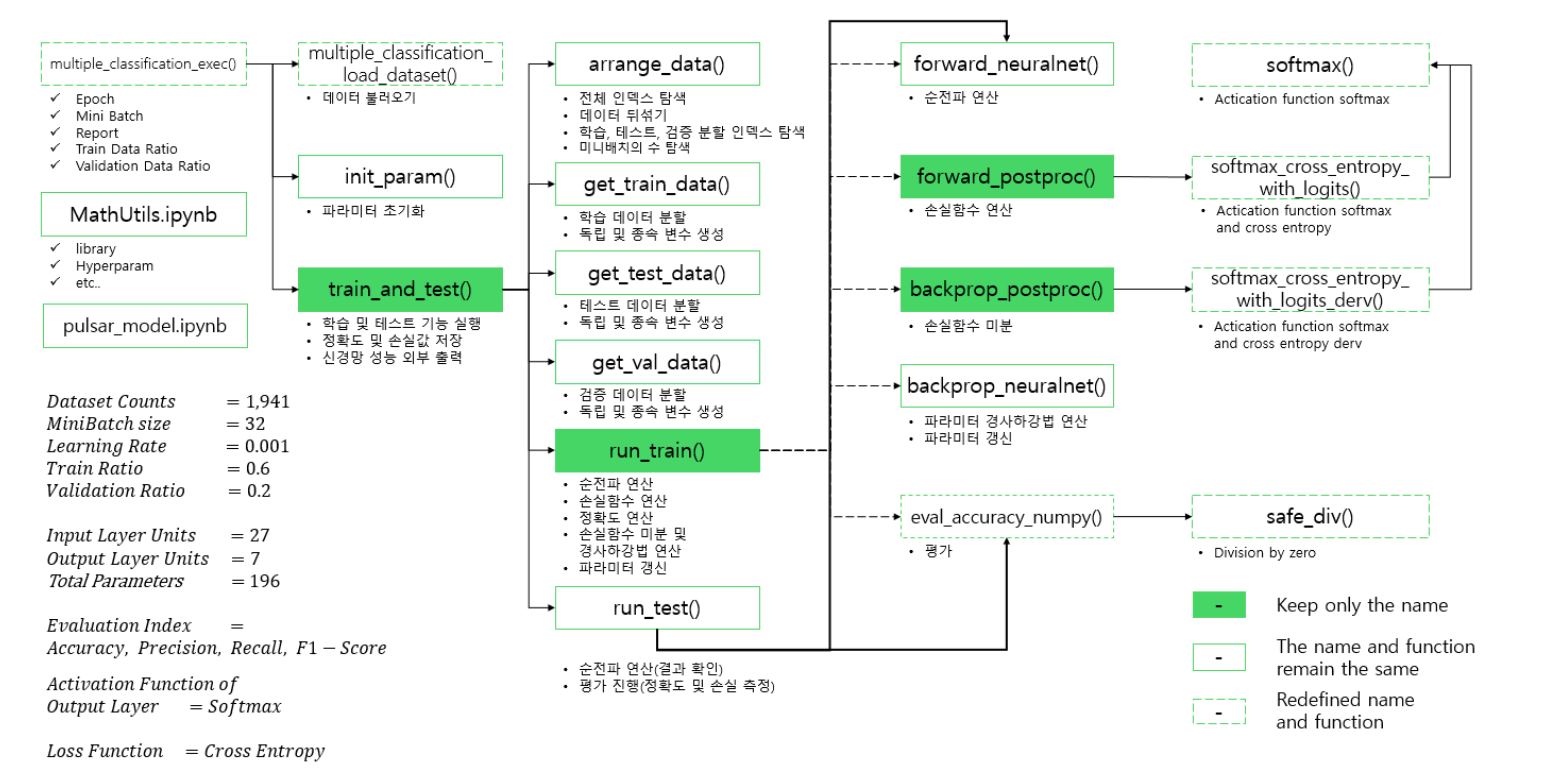

버튼부터 만들어야 하는데, 버튼을 꾹 누르면 데이터를 불러오는 함수와 파라미터초기화함수, 학습과 테스트를 수행하는 함수 이 세가지가 동시에 동작을 하다보니까, exec() 함수부터 만들어주자!

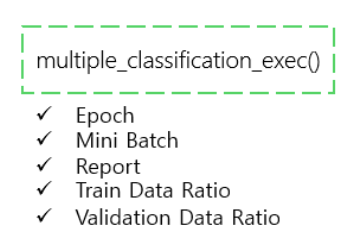

In [ ]:
# 버튼함수. 디폴트값 설정해줌
def multiple_classification_exec(epoch_count=10, mb_size=10, report=1, train_ratio=0.6, val_ratio=0.2):
  multiple_classification_load_dataset()
  init_param()
  train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio)

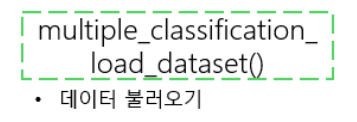

In [ ]:
# 데이터를 불러오는 함수를 만들건데, 사실 저번 pulsar 데이터 다룰 때 만들었었음. 
# 파일열고.. 뭐 그런 기능 하는 함수
# 현재 철판 데이터에는 문자열도 없고. 그냥 원핫인코딩이 되어있기 때문에 딱히 어떤 처리가 필요없음
# 그렇기 때문에, pulsar_model.ipynb의 load_dataset 함수의 부분을 복붙하자!
def multiple_classification_load_dataset():
    # with open('/content/faults.csv') as csvfile:
    with open('/content/faults_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 27, 7 # 독립변수 27개, 종속변수 7개
    data = np.asarray(rows, dtype='float32')

In [ ]:
multiple_classification_load_dataset()
data.shape # 전역변수로 설정한 data의 값이 잘 나오는 것을 확인할 수 있다
# 미니데이터이기때문에 일단 행이 10개밖에 없음. 컬럼은 독립변수 27개와 종속 변수 7개

(10, 34)

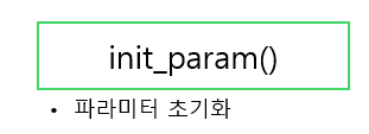

In [ ]:
init_param() # 초기 weight와 bias의 값을 보여줌!

Initial weight Value : 
[[ 0.04973447  0.01158483  0.01997685  0.07649874 -0.01784963  0.01120924
  -0.0165776 ]
 [ 0.01190765 -0.01719767 -0.01498454 -0.0219689  -0.04438034  0.0109119
  -0.03262154]
 [-0.0074904   0.03488777 -0.00760188  0.05106158 -0.03017079  0.02531015
   0.00925523]
 [ 0.0043226  -0.0337801  -0.01445673  0.02132225 -0.00574758  0.07381102
  -0.03272403]
 [ 0.00805734  0.03819923  0.05753367  0.01663966  0.00172641  0.034718
   0.02785121]
 [-0.01796668  0.06826749  0.02786206  0.0198883  -0.01058925 -0.01932442
  -0.02520081]
 [ 0.02025034  0.09189611  0.02109325  0.00041557 -0.02740367 -0.04164093
   0.02717841]
 [-0.08180847 -0.04221827 -0.02529964  0.03126699 -0.02726668  0.0062226
   0.00355624]
 [-0.02676433  0.0441001   0.00129631 -0.01111257 -0.04080848  0.02012143
   0.021462  ]
 [-0.06052771 -0.00078723  0.05469361 -0.01118601 -0.02295793  0.00624045
  -0.0210144 ]
 [ 0.02235599 -0.00615863 -0.00251891  0.00143957 -0.05701867  0.02393352
  -0.03158757]
 

근데... weight와 bias가 저렇다는 것은 알겠는데... 출력은 좀 숨기고 싶다. 여기서 바로 수정할 수 있는 방법이 있나? 물론 코랩파일로 들어가서 print문 삭제해주는 방법도 있음.

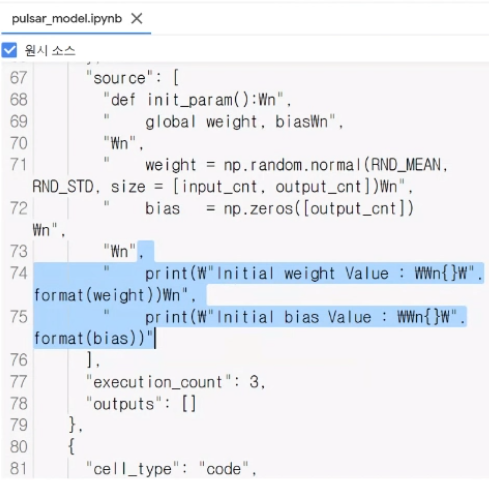

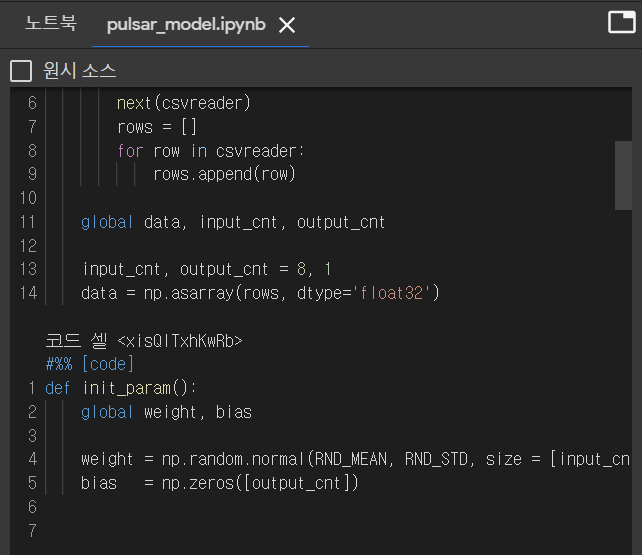

print문이 없어진 것을 곧바로 확인할 수있다!
바꿔줬으니, 다시 파일 불러와서 동작시켜주자!

In [ ]:
%run /content/pulsar_model.ipynb

In [ ]:
init_param()

In [ ]:
print("weight.shape : ", weight.shape)
print("bias.shape : ", bias.shape)

weight.shape :  (27, 7)
bias.shape :  (7,)


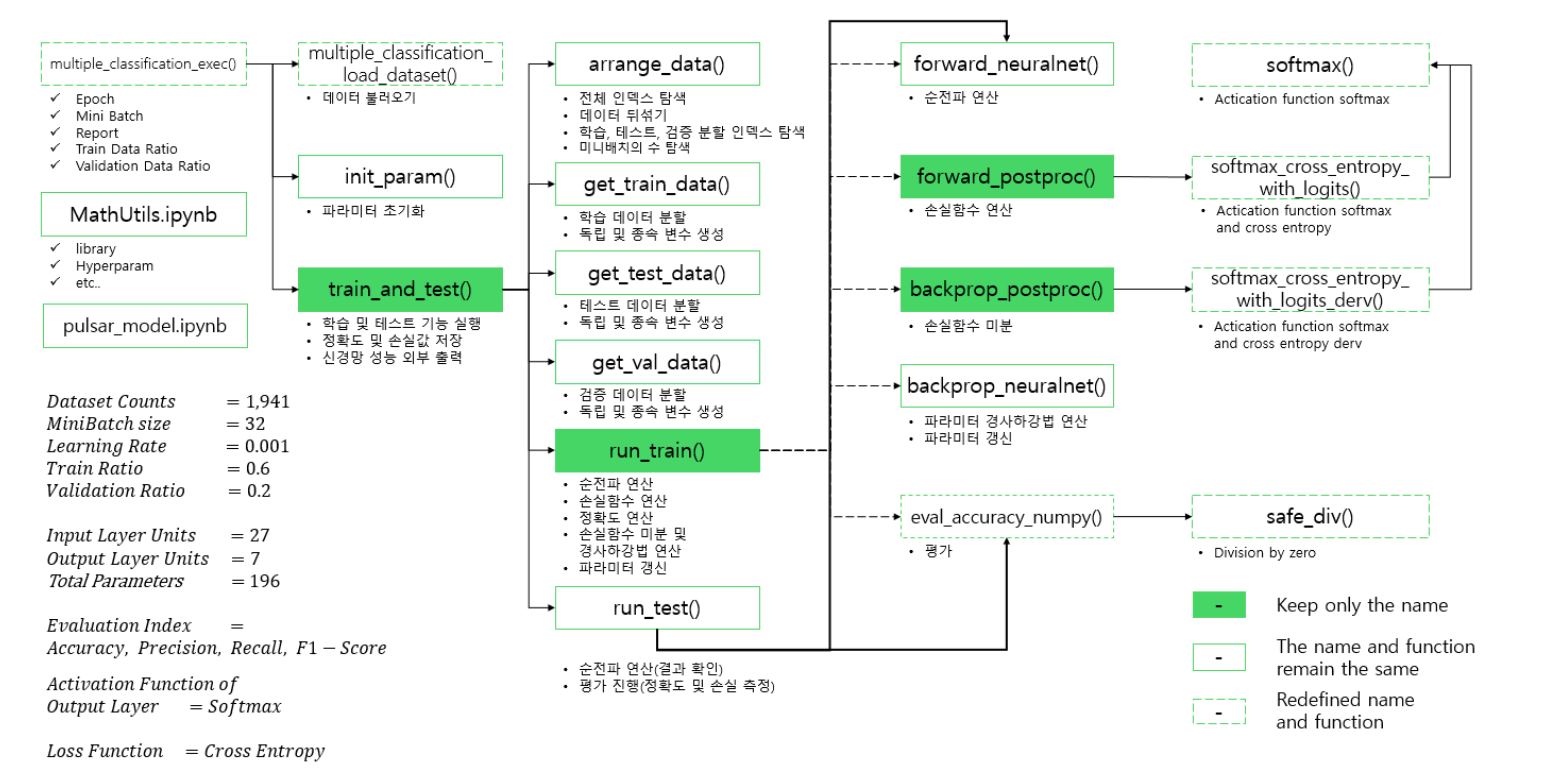

그 다음으로 볼 함수는 train_and_test()함수인데, 저 함수가 돌아가면 5개의 함수가 또 이 안에서 돌아가는 구조이다. 초록 실선이니, 그냥 있는 거 가져와서 쓰면 되는 함수이다.

In [ ]:
mini_batch_step_count = arrange_data(mb_size = 6, train_ratio=0.6, val_ratio = 0.2) # 이 함수는 한번의 에폭을 돌리기 위해서 미니배치 몇개 필요한지 개수를 반환한다.
mini_batch_step_count

1

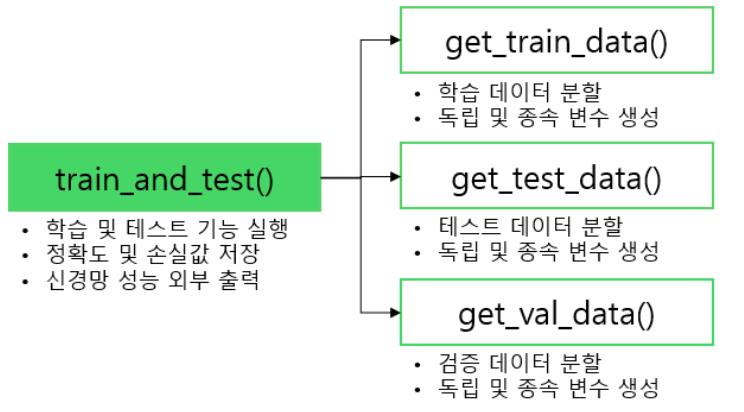

위 세 함수들도 있는 거 그냥 갖다 쓰면 되는 함수임!

In [ ]:
train_x, train_y = get_train_data(mb_size=6, n= 0) # 학습데이터에 대한 독립과 종속
test_x, test_y = get_test_data()
val_x, val_y = get_val_data()

In [ ]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
print(val_x.shape, val_y.shape)

(6, 27) (6, 7)
(2, 27) (2, 7)
(2, 27) (2, 7)
